In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
Img_size=224
Batch_size=32

In [15]:
train_data=ImageDataGenerator(rescale=1/255,validation_split=0.2)

In [18]:
train_genarator=train_data.flow_from_directory(
    '/content/drive/MyDrive/test/Data',
target_size=(Img_size,Img_size),
batch_size=Batch_size,
class_mode='binary',
subset='training',)

Found 320 images belonging to 2 classes.


In [19]:
val_genarator=train_data.flow_from_directory(
    '/content/drive/MyDrive/test/Data',
target_size=(Img_size,Img_size),
batch_size=Batch_size,
class_mode='binary',
subset='validation',)

Found 80 images belonging to 2 classes.


In [20]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(Img_size,Img_size,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_genarator,epochs=5,validation_data=val_genarator,batch_size=Batch_size)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.4748 - loss: 1.6195

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 123s 11s/step - accuracy: 0.4737 - loss: 1.5802 - val_accuracy: 0.5000 - val_loss: 0.6892
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.5571 - loss: 0.6889 - val_accuracy: 0.5000 - val_loss: 0.7251
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.5533 - loss: 0.6803 - val_accuracy: 0.8875 - val_loss: 0.6575
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.7318 - loss: 0.6468 - val_accuracy: 0.7000 - val_loss: 0.5688
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.7582 - loss: 0.5706 - val_accuracy: 0.8250 - val_loss: 0.4911


In [34]:
model.save('/content/drive/MyDrive/Flood_vs_No_Flood/FloodvsNoFlood.h5')

In [35]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/Flood_vs_No_Flood/FloodvsNoFlood.h5')
print("Model Loaded")

Model Loaded


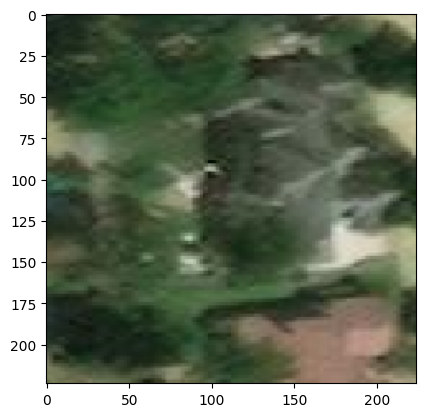

In [41]:
test_image_path="/content/-95.182393_30.032069.jpeg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [42]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=img_array/255
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
[[0.6120101]]


In [44]:
if prediction<0.5:
  print("No Flood")
else:
  print("Flood")

Flood
